# CS 6476 Assignment 1 - Numpy and PyTorch

This initial section of the assignment focuses on building a comprehension of the Numpy framework. There are five main problems in this part:   
1. Using `Broadcasting`, implement a nearest centroid classifier and Euclidean distance computation.
2. Center Crop
3. Affine Transformation
4. Gaussian Blur
5. Sobel Edge Detector

## Introduction to NumPy

For those who are new to Numpy, here's a concise overview of the key aspects of the framework:

Numpy is a fundamental library for numerical computations in Python, offering a versatile set of tools for working with arrays and matrices. Its main features include:

- **Efficient Array Operations**: Numpy provides an array-like data structure that enables efficient manipulation of large datasets with support for various mathematical operations.

- **Multi-dimensional Arrays**: Numpy introduces the concept of multi-dimensional arrays, allowing you to work with matrices and arrays of any dimension.

- **Broad Range of Functions**: The library offers an extensive collection of mathematical functions, ranging from basic arithmetic to advanced linear algebra and statistical operations.

- **Indexing and Slicing**: Numpy provides flexible indexing and slicing capabilities that enable you to extract and manipulate subsets of data arrays easily.

- **Broadcasting**: Numpy's broadcasting feature simplifies operations on arrays with different shapes, making it more intuitive to perform element-wise computations.

- **Integration with Other Libraries**: Numpy is often used as a foundation for other scientific and machine learning libraries due to its efficiency and versatility.

In the upcoming sections of this assignment, we will delve into the realm of Numpy and focus on its core functionalities, demonstrating how to harness its capabilities to process data and perform various numerical tasks efficiently. Just as in the case of PyTorch, gaining a solid understanding of Numpy is essential for effectively working with data and implementing algorithms in the context of this course.

Few Resources which would be useful to get started with:

https://numpy.org/doc/stable/ (Official Documentation)

https://www.w3schools.com/python/numpy/numpy_intro.asp

https://www.youtube.com/watch?v=QUT1VHiLmmI

**1) BROADCASTING:**

Implement a nearest centroid classifier using broadcasting and Euclidean distance computation. Given a dataset of data points and the number of labels, you need to classify the data points into one of the k classes. The classifier should be trained through a specified number of iterations.

**Constraints:**
1. The dataset contains n data points, each having d dimensions.
2. There are k classes.
3. The classifier should be iterated for a specific number of iterations.
4. Use only the Python NumPy library for computation.

**Input:**
1. data: A 2D NumPy array of shape (n, d) containing the data points.
2. no_of_labels (int): Number of Labels.
3. iterations (int): Number of iterations for classifier updates.

**Output:**

predicted_labels: A 1D NumPy array of shape (n,) containing the predicted class labels for each data point after the specified iterations.

**Steps:**

1. You can initialize the centroid as a random data point FROM the 'data' input.
2. Calculate distances between data points and the centroids.
3. Store the nearest centroid and return the predicted labels based on the nearest centroids.

Source: https://en.wikipedia.org/wiki/Nearest_centroid_classifier

In [1]:
import numpy as np
def nearest_centroid_classifier(data, no_of_labels, iterations):
    n, d = data.shape
    k = no_of_labels
    
    """
    Implement the nearest centroid classifier using only broadcasting and Euclidean distance.
    Assume any random points FROM the data points as the initial centroid values.

    Args:
    data (numpy.ndarray): A 2D array of shape (n, d) containing the data points.
    no_of_labels (int): Number of Labels.
    iterations (int): Number of iterations for classifier updates.

    Returns:
    numpy.ndarray: A 1D array of shape (n,) containing predicted class labels after iterations.
    """
    
    for iter in range(iterations):
        if iter == 0:
            means_indices = np.random.choice(n, size=k, replace=False)  #Randomly choose k data points as means
            means = data[means_indices]
        data_broadcasted = data[:,np.newaxis,:]      #(n x 1 x d) for broadcasting
        means_broadcasted = means[np.newaxis,:,:]    #(1 x k x d) for broadcasting
        euclidean_dists = np.sqrt(np.sum((data_broadcasted - means_broadcasted)**2, axis=2))
        clusters = np.argmin(euclidean_dists, axis=1)   #(nx1) Contains the predicted cluster for each data point
        cluster_counts = np.bincount(clusters)      #(kx1) Contains the no. of data points in each cluster
        #Update means
        means = np.zeros((k, d))    #Initialize centroids as zeros
        np.add.at(means, clusters, data)    #Add data points based on the clusters and store them in means 
        means /= cluster_counts[:, np.newaxis]

    predicted_labels = clusters
    return predicted_labels

# Dummy data for testing: (One of the Unit Test Cases)
n = 100
d = 2
k = 2
iterations = 10

data = np.random.rand(n, d)
#data = np.array([[1, -1], [1, 1], [0,0], [-1, -1]])
predicted_labels = nearest_centroid_classifier(data, k, iterations=10)
print(predicted_labels)  # Output: Array of predicted labels


[1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1
 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0
 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0]


**2) CENTER CROP:**

**Problem Statement:**

The task is to implement center cropping for image preprocessing. Given an input image and a desired crop size, your goal is to perform center cropping to extract a region of interest from the center of the image. This technique can be useful for focusing on specific features or objects within an image.


**Constraints:**

- The code should use only the `numpy` and `PIL` libraries for image manipulation.


**Input:**

A single image in JPEG format.

**Output:**

The output is a visualization of the original input image and the result of applying inception cropping to the input image. The original image and the cropped image are displayed side by side in a single plot.

**Steps:**

1. Calculate the center coordinates (y, x) of the image.
2. Calculate the half size of the desired center crop.
3. Use array slicing to extract the region of interest from the image.
4. Return the cropped region as the result.


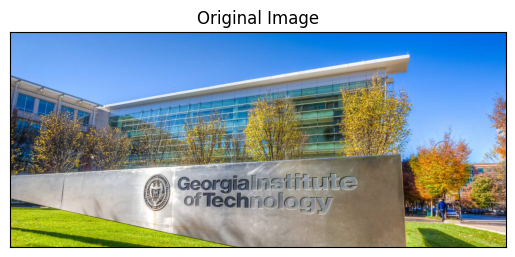

(650, 1500, 4)
Image Width: 1500
Image Height: 650
Number of Channels: 4


In [2]:
#########################################################
#############  DO NOT CHANGE THIS CELL  #################
#########################################################
#########################################################
##### RUN THIS BEFORE RUNNING ANY IMAGE BASED TASKS #####
#########################################################

import numpy as np
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# URL of the image
image_url = "https://research.gatech.edu/sites/default/files/visit-tech_1.png"

response = requests.get(image_url)
image = np.array(Image.open(BytesIO(response.content)))

plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.show()
height, width, channels = image.shape
print(image.shape)
print("Image Width:", width)
print("Image Height:", height)
print("Number of Channels:", channels)

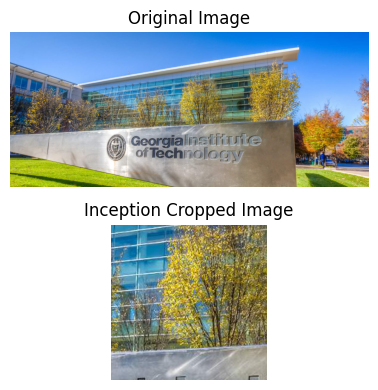

(224, 224, 4)
Image Width: 224
Image Height: 224
Number of Channels: 4


In [14]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def center_crop(image, center_crop_size):
    ## Enter your Code Only here
    cy, cx = image.shape[0]//2, image.shape[1]//2
    cropped_image = image[cy-center_crop_size//2:cy+center_crop_size//2,cx-center_crop_size//2:cx+center_crop_size//2]
    return cropped_image

if __name__ == "__main__":
    center_crop_size = 224  # Size of the central crop

    cropped_image = center_crop(image, center_crop_size)

    # Plot the original and cropped images
    plt.figure(figsize=(8, 4))
    plt.subplot(2, 1, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(2, 1, 2)
    plt.imshow(cropped_image)
    plt.title("Inception Cropped Image")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    print(cropped_image.shape)
    height, width, channels = cropped_image.shape
    print("Image Width:", width)
    print("Image Height:", height)
    print("Number of Channels:", channels)


**3) AFFINE TRANSFORMATION:**

You are given a set of 2D points representing the vertices of a polygon. Implement a function affine_transform(points, rotation_angle, scale_x, scale_y, translation) that applies an affine transformation to the input points. The transformation involves rotating the polygon by the given angle (in degrees), scaling it by the given factors in the x and y directions, and then translating it by the given translation vector.

Write a function that takes in the following inputs:

1. points (list of lists): A list of 2D points, where each point is represented as a list [x, y].
2. rotation_angle (float): The angle of rotation in degrees.
3. scale_x (float): Scaling factor along the x-axis.
4. scale_y (float): Scaling factor along the y-axis.
5. translation (list): A translation vector represented as a list [tx, ty].

The function should return a new list of transformed points, following the specified sequence of transformations.

**Steps:**

1. Convert Angle to Radians:

    1.1 Convert the given rotation angle from degrees to radians.

2. Define Transformation Matrices:

    2.1 Create a rotation matrix using the cosine and sine of the angle.

    2.2 Create a scaling matrix with the provided scale_x and scale_y factors.

    2.3 Create a translation vector using the translation list.

3. Apply Transformations:

    3.1 Use the rotation matrix to transform the points by matrix multiplication.
    
    3.2 Use the scaling matrix to further transform the points.
    
    3.3 Add the translation vector to each point.

4. Return Transformed Points

In [23]:
import numpy as np

def affine_transform(points, rotation_angle, scale_x, scale_y, translation):
	"""
	Apply an affine transformation to a set of 2D points.

	Args:
		points (list of lists): A list of 2D points, where each point is represented as a list [x, y].
		rotation_angle (float): The angle of rotation in degrees.
		scale_x (float): Scaling factor along the x-axis.
		scale_y (float): Scaling factor along the y-axis.
		translation (list): A translation vector represented as a list [tx, ty].

	Returns:
		list: Transformed set of points.
	"""
	# Convert rotation angle to radians
	theta = rotation_angle * np.pi/180
	# Define transformation matrices
	R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
	S = np.array([scale_x, scale_y])
	T = np.array(translation)

	# Apply transformations
	points = np.array(points)
	rotated_points = (R @ points.T).T
	scaled_points = np.multiply(rotated_points,S)
	translated_points = np.add(scaled_points, T)

	transformed_points = translated_points
	return transformed_points

# Example::
points = np.array([[1, 1], [1, 4], [4, 4], [4, 1]])
rotation_angle = 45  # degrees
scale_x = 2.0
scale_y = 0.5
translation = [2, 3]

# Call the function and print the result
transformed_points = affine_transform(points, rotation_angle, scale_x, scale_y, translation)
print("Original points:", points)
print("Transformed points:", transformed_points)


Original points: [[1 1]
 [1 4]
 [4 4]
 [4 1]]
Transformed points: [[ 2.          3.70710678]
 [-2.24264069  4.76776695]
 [ 2.          5.82842712]
 [ 6.24264069  4.76776695]]



**4) GAUSSIAN BLUR:**

**Problem Definition:**

You are tasked with implementing a Gaussian blur filter for images. Gaussian blur is a common image processing technique used to reduce noise and detail in an image by averaging the pixel values within a local neighborhood. Your goal is to take a color image and apply a Gaussian blur filter to its grayscale representation.

**Input:**

A 3D array representing a color image. The dimensions are (height, width, channels), where channels represents the color channels (e.g., Red, Green, Blue).
An integer sigma representing the standard deviation of the Gaussian distribution. The value of sigma determines the blurring strength.

**Output:**

A 2D array representing the grayscale version of the input image, converted using the formula: **Y = 0.2989 * R + 0.5870 * G + 0.1140 * B**, where R, G, and B are the pixel values for the respective color channels.

**Constraints:**

The input image array dimensions: 1 <= height, width <= 1000, channels = 3.
The value of sigma: 0.5 <= sigma <= 5.0.

**Note:**

You should implement the Gaussian blur filter without using external libraries like SciPy or OpenCV. Convolution with a Gaussian kernel should be used for blurring.
The input image should be first converted to grayscale before applying the blur.

------------------------------------------------------------------

**Steps to Implement:**

1. **Convert to Grayscale:**

  Start by converting the color image to grayscale. This simplifies the process as we'll work with a 2D array.

2. **Create Gaussian Kernel:**

  Formulate a Gaussian kernel based on the standard deviation (σ). The Gaussian kernel represents the Gaussian distribution used for blurring.
  
  The formula for the Gaussian kernel is:

  **$G(x, y) = \frac{1}{{2 \pi \sigma^2}} \cdot e^{-\frac{x^2 + y^2}{{2 \sigma^2}}}$**


- `G(x, y)`: The value at position `(x, y)` in the Gaussian kernel.
- `σ`: The standard deviation that determines the blurring strength.
- `π`: The mathematical constant Pi.
- `e`: The base of the natural logarithm.
- `(x^2 + y^2)`: The squared distance from the kernel center.

The formula calculates the weight of each kernel element based on its distance from the center, and guides the creation of the Gaussian kernel, which is used for convolution in the Gaussian blur process.

3. **Normalize the Kernel:**

  Ensure the kernel values sum to 1. Divide each value by the sum of all values. This maintains image brightness during convolution.

4. **Apply Convolution:**
  
  Slide the Gaussian kernel over the grayscale image. Calculate the weighted average of pixel values within the kernel's neighborhood. Replace each pixel with the calculated average.

5. **Output Blurred Image:**

  The image after convolution is the blurred image. It will have less detail and noise due to the Gaussian averaging.

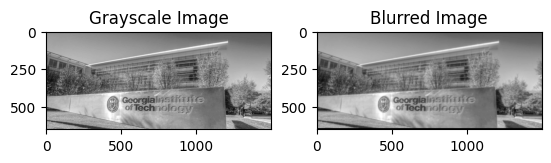

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def convert_to_grayscale(image_array):
    # Convert the 3D image array to grayscale using the formula Y = 0.2989*R + 0.5870*G + 0.1140*B
    grayscale_image = np.dot(image_array[..., :3], [0.2989, 0.5870, 0.1140])
    return grayscale_image

def apply_gaussian_blur(image_array, sigma):
    ## Enter your code only Here... Dont change the rest of the functions/code
    kernel_size = 6*sigma + 1
    x, y = np.meshgrid(np.arange(-kernel_size // 2 + 1, kernel_size // 2 + 1), np.arange(-kernel_size // 2 + 1, kernel_size // 2 + 1))  # Create Gaussian kernel
    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel /= np.sum(kernel)    #Normalize

    blurred_image_array = np.zeros_like(image_array)
    for i in range(kernel_size // 2, image_array.shape[0] - kernel_size // 2):
        for j in range(kernel_size // 2, image_array.shape[1] - kernel_size // 2):
            roi = image_array[i - kernel_size // 2:i + kernel_size // 2 + 1, j - kernel_size // 2:j + kernel_size // 2 + 1]
            blurred_image_array[i, j] = np.sum(roi * kernel)
    return blurred_image_array


# Convert the image to a NumPy array
image_array = np.array(image, dtype=np.float64)  # Convert to float for blurring
# Convert the image to grayscale
grayscale_image = convert_to_grayscale(image_array)
# Apply Gaussian blur with a specified standard deviation
sigma = 2
blurred_image_array = apply_gaussian_blur(grayscale_image, sigma)

# Display the original and blurred images
plt.subplot(1, 2, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Grayscale Image')

plt.subplot(1, 2, 2)
plt.imshow(blurred_image_array, cmap='gray')
plt.title('Blurred Image')

plt.show()


**5)  SOBEL EDGE DETECTION:**

**Problem Statement:**

Given an input image represented as a grayscale NumPy array, implement edge detection using the Sobel operator. The goal is to highlight edges within the image by calculating the gradient magnitude and applying a threshold.

**Input:**

A grayscale image represented as a 2D NumPy array. Each pixel value represents the intensity of the pixel, typically ranging from 0 (black) to 255 (white).


**Output:**

A binary edge map represented as a 2D NumPy array of the same shape as the input image. Each element of the output array should be either 0 (no edge) or 1 (edge).


**Task:**

Load the grayscale image and represent it as a 2D NumPy array.
Implement the Sobel operator to calculate gradients in the x and y directions.
Calculate the gradient magnitude at each pixel using the calculated gradients.
Apply a threshold to the gradient magnitude array to obtain the binary edge map.

**Constraints:**

The input image will be a square grayscale image with dimensions N x N (1 ≤ N ≤ 1000). Each pixel intensity value in the input image will be in the range 0 to 255. The threshold value for edge detection will be a positive integer less than 255.

**Steps:**

1. Convert the color image to grayscale for simplicity.
2. Calculate horizontal and vertical gradients using Sobel operators.
3. Combine gradients to get gradient magnitude.
4. Apply threshold: if gradient magnitude > threshold, pixel is an edge. (Threshold = 150, dont change)
5. Return binary edge map.

Hint:

Use Sobel Operators as follows:

Sobel X =   
\begin{bmatrix}
-1 & 0 & 1\\
-2 & 0 & 2\\
-1 & 0 & 1
\end{bmatrix}

Sobel Y = \begin{bmatrix}
-1 & -2 & -1\\
0 & 0 & 0\\
1 & 2 & 1
\end{bmatrix}


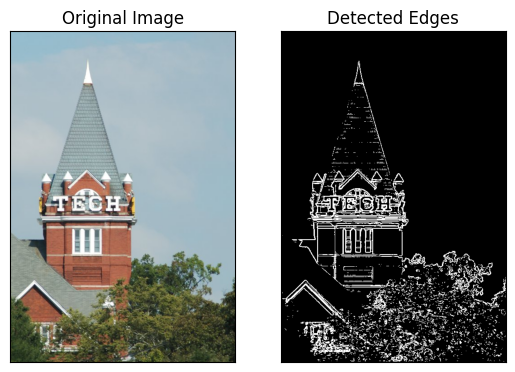

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

def sobel_edge_detection(image, threshold):

    ## PERFORM TASKS HERE
    image = convert_to_grayscale(image)
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])    #Sobel operator for X
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])    #Sobel operator for Y
    
    gradient_x = np.zeros_like(image)
    gradient_y = np.zeros_like(image)

    # Apply convolution using Sobel kernels
    for i in range(1, image.shape[0]-1):
        for j in range(1, image.shape[1]-1):
            roi = image[i-1:i+2, j-1:j+2]
            gradient_x[i,j] = np.sum(roi*sobel_x)
            gradient_y[i,j] = np.sum(roi*sobel_y)
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    edges = gradient_magnitude > threshold
    return edges.astype(np.uint8)


image_url = "https://upload.wikimedia.org/wikipedia/commons/4/40/TechTower.jpg"
response = requests.get(image_url)
input_image = np.array(Image.open(BytesIO(response.content)))

threshold_value = 150 ## Dont change this value
edge_map = sobel_edge_detection(input_image, threshold_value)

# Display the original image and the detected edges
plt.subplot(121), plt.imshow(input_image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edge_map, cmap='gray')
plt.title('Detected Edges'), plt.xticks([]), plt.yticks([])
plt.show()


In [33]:
a = np.array([2,1.5,0])
b = a>1
b.astype(int)

array([1, 1, 0])